# Proyecto: 
## **Forbes Richest Athletes 1990-2020 Analysis**

#### Alumnos: 
- Daniel Eduardo López Martínez
- Raziel Gutiérrez Moncayo
- Sabrina Contreras


El dataset a analizar corresponde a un ranking año con año desde 1990 hasta 2020 sobre los deportistas más ricos según la revista Forbes.

### 1. Carga de librerías

In [80]:
# Carga de las librerías a emplear
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime as dt

In [81]:
%matplotlib inline
mpl.style.use(['ggplot']) # For ggplot-like style 

### 2. Carga del dataset

In [82]:
# Cargado del data set a través de pandas
# El dataset se encuentra en la carpeta "data"
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020) (3).csv')

### 3. Exploración del dataset

In [83]:
df.head(10) # Primeros 10 datos 

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [84]:
df.tail(10) # Últimos 10 datos

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
291,292,Roger Federer,Switzerland,1,5,Tennis,2020,106.3
292,293,Cristiano Ronaldo,Portugal,2,2,Soccer,2020,105.0
293,294,Lionel Messi,Argentina,3,1,Soccer,2020,104.0
294,295,Neymar,Brazil,4,3,Soccer,2020,95.5
295,296,LeBron James,USA,5,8,Basketball,2020,88.2
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


Del resultado anterior se puede concluir que el campo "Previous Year Rank" contiene valores nulos, mientras que los demás campos no.

In [86]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


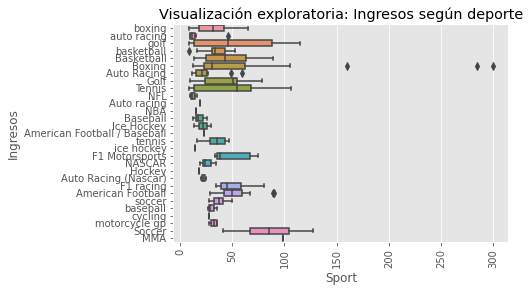

In [87]:
sns.boxplot(data= df, y='Sport', x='earnings ($ million)')
plt.title('Visualización exploratoria: Ingresos según deporte')
plt.xlabel('Sport')
plt.xticks(rotation = 90) 
plt.ylabel('Ingresos')
plt.show()

De la figura anterior se observa que los datos de los nombres de los deportes están sucios. Pues hay algunas en minúsculas y otros capitalizados, así como distintos nombres para un mismo deporte.

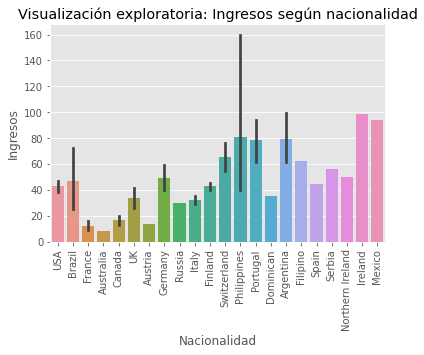

In [88]:
sns.barplot(data= df, x='Nationality', y='earnings ($ million)')
plt.title('Visualización exploratoria: Ingresos según nacionalidad')
plt.xlabel('Nacionalidad')
plt.xticks(rotation = 90) 
plt.ylabel('Ingresos')
plt.show()

De la figura anterior se observa que los datos de las nacionalidades se encuentran limpios y son consistentes.

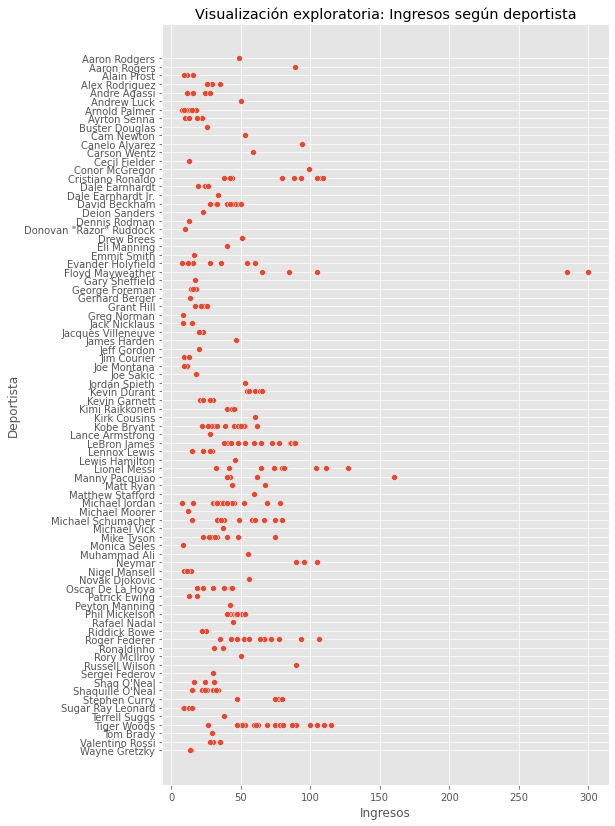

In [89]:
plt.figure(figsize = (8,14))
sns.scatterplot(data= df.sort_values('Name'), y='Name', x='earnings ($ million)')
plt.title('Visualización exploratoria: Ingresos según deportista')
plt.xlabel('Ingresos')
plt.ylabel('Deportista')
plt.show()

De lo anterior se visualizan inconsistencias en los datos de Aaron Rodgers, Dale Earnhardt y Shaquille O'Neill

### 4. Limpieza del dataset

In [90]:
# Para los propósitos del presente análisis, se ajustarán las observaciones de la columna "Previous Year Rank" del dataset, ya que cuenta con valores nulos
#como se indicó anteriormente. 
df['Previous Year Rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

In [91]:
# Limpiamos las inconsistencias en la columna: Previous Year Rank
df['Previous Year Rank'] = df['Previous Year Rank'].replace(['>40','>10','>14','>20','>30','>100'],['40','10','14','20','30','100']) #Eliminamos signo de >
df['Previous Year Rank'] = df['Previous Year Rank'].replace(["none","?","??"],"not ranked") #Reemplazamos los datos none por "not ranked"
df.fillna({'Previous Year Rank':'not ranked'},inplace=True) #Llenamos Nan por "not ranked"
df['Previous Year Rank'].unique()

array(['not ranked', '8', '1', '30', '4', '5', '12', '6', '3', '9', '17',
       '13', '10', '40', '19', '7', '11', '22', '20', '38', '2', '15',
       '14', '26', '18', '24', '21', '100'], dtype=object)

In [92]:
# Renombramos el nombre de algunas columnas por nombres más convenientes
df.rename(columns = {'S.NO':'Index', 'Current Rank':'Actual Rank','Previous Year Rank': 'Previous Rank', 'earnings ($ million)': 'Earnings ($M)'}, inplace = True)
df.head()

,Index,Name,Nationality,Actual Rank,Previous Rank,Sport,Year,Earnings ($M)
0,1,Mike Tyson,USA,1,not ranked,boxing,1990,28.6
1,2,Buster Douglas,USA,2,not ranked,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,not ranked,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,not ranked,auto racing,1990,10.0
4,5,Alain Prost,France,5,not ranked,auto racing,1990,9.0


In [93]:
# Finalmente se procede a reajustar el index del dataframe a Index
df.set_index('Index', inplace = True)
df.head()

,Name,Nationality,Actual Rank,Previous Rank,Sport,Year,Earnings ($M)
Index,,,,,,,
1,Mike Tyson,USA,1,not ranked,boxing,1990,28.6
2,Buster Douglas,USA,2,not ranked,boxing,1990,26.0
3,Sugar Ray Leonard,USA,3,not ranked,boxing,1990,13.0
4,Ayrton Senna,Brazil,4,not ranked,auto racing,1990,10.0
5,Alain Prost,France,5,not ranked,auto racing,1990,9.0


In [94]:
# Convertimos el campo de Sport a formato de títulos para que haya consistencia entre mayúsculas y minusculas
df['Sport'] = df['Sport'].str.title()
df['Sport'].unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis', 'Nfl',
       'Nba', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'F1 Motorsports', 'Nascar', 'Hockey', 'Auto Racing (Nascar)',
       'F1 Racing', 'American Football', 'Soccer', 'Cycling',
       'Motorcycle Gp', 'Mma'], dtype=object)

In [95]:
# Se observa que hay inconsistencias entre los nombres de los deportes, por lo que se procede a limpiar los datos con nombres más generales
df['Sport'] = df['Sport'].replace(['Auto Racing (Nascar)','Nascar','F1 Racing', 'F1 Motorsports'],'Auto Racing')
df['Sport'] = df['Sport'].replace('Nba','Basketball')
df['Sport'] = df['Sport'].replace(['Nfl','American Football / Baseball'],'American Football')
df['Sport'] = df['Sport'].replace('Ice Hockey','Hockey')
df['Sport'] = df['Sport'].replace('Motorcycle Gp','Motorcycle GP')
df['Sport'] = df['Sport'].replace('Mma','MMA')
df['Sport'].unique()

array(['Boxing', 'Auto Racing', 'Golf', 'Basketball', 'Tennis',
       'American Football', 'Baseball', 'Hockey', 'Soccer', 'Cycling',
       'Motorcycle GP', 'MMA'], dtype=object)

In [96]:
# Posteriormente limpiamos las inconsistencias en los nombres de algunos deportistas

In [97]:
df['Name'] = df['Name'].replace('Aaron Rogers','Aaron Rodgers')
df['Name'] = df['Name'].replace('Dale Earnhardt Jr.','Dale Earnhardt')
df['Name'] = df['Name'].replace("Shaq O'Neill","Shaquille O'Neill")
df['Name'].unique()

array(['Mike Tyson', 'Buster Douglas', 'Sugar Ray Leonard',
       'Ayrton Senna', 'Alain Prost', 'Jack Nicklaus', 'Greg Norman',
       'Michael Jordan', 'Arnold Palmer', 'Evander Holyfield',
       'George Foreman', 'Donovan "Razor" Ruddock', 'Nigel Mansell',
       'Andre Agassi', 'Joe Montana', 'Jim Courier', 'Monica Seles',
       'Riddick Bowe', "Shaquille O'Neal", 'Lennox Lewis',
       'Cecil Fielder', "Shaq O'Neal", 'Gerhard Berger', 'Wayne Gretzky',
       'Michael Moorer', 'Deion Sanders', 'Michael Schumacher',
       'Emmit Smith', 'Dennis Rodman', 'Patrick Ewing',
       'Oscar De La Hoya', 'Tiger Woods', 'Dale Earnhardt', 'Joe Sakic',
       'Grant Hill', 'Sergei Federov', 'Gary Sheffield', 'Kevin Garnett',
       'Kobe Bryant', 'Jacques Villeneuve', 'Jeff Gordon',
       'Alex Rodriguez', 'Peyton Manning', 'David Beckham',
       'Michael Vick', 'Lance Armstrong', 'Valentino Rossi',
       'Muhammad Ali', 'Phil Mickelson', 'Tom Brady', 'Kimi Raikkonen',
       'Ronaldinh

In [98]:
# Ahora el dataset está limpio y listo para su análisis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1 to 301
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           301 non-null    object 
 1   Nationality    301 non-null    object 
 2   Actual Rank    301 non-null    int64  
 3   Previous Rank  301 non-null    object 
 4   Sport          301 non-null    object 
 5   Year           301 non-null    int64  
 6   Earnings ($M)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 18.8+ KB


### 5. Análisis y Visualización del Dataset

In [99]:
#Análisis estadístico descriptivo
df.describe()

,Actual Rank,Year,Earnings ($M)
count,301.000000,301.000000,301.000000
mean,5.448505,2005.122924,45.516279
std,2.850995,9.063563,33.525337
min,1.000000,1990.000000,8.100000
25%,3.000000,1997.000000,24.000000
50%,5.000000,2005.000000,39.000000
75%,8.000000,2013.000000,59.400000
max,10.000000,2020.000000,300.000000


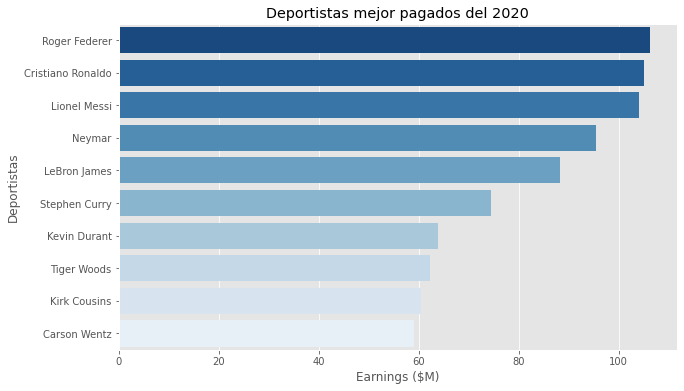

In [100]:
# Deportistas mejor pagados de 2020
df_2020 = df[df['Year'] == 2020]

plt.figure(figsize = (10,6))
sns.barplot(data= df_2020, x='Earnings ($M)', y='Name', palette='Blues_r')
plt.title('Deportistas mejor pagados del 2020')
plt.xlabel('Earnings ($M)')
plt.ylabel('Deportistas')
plt.show()

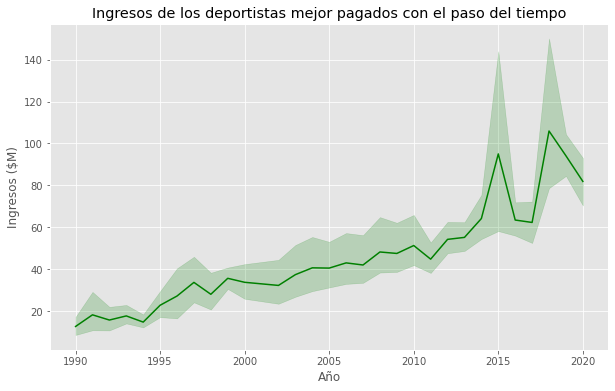

In [101]:
# Ingresos de los deportistas mejor pagados con el paso del tiempo
plt.figure(figsize = (10,6))
sns.lineplot(data= df, x='Year', y='Earnings ($M)', color = "Green")
plt.title('Ingresos de los deportistas mejor pagados con el paso del tiempo')
plt.xlabel('Año') 
plt.ylabel('Ingresos ($M)')
plt.show()

De la figura anterior se observa que los ingresos han crecido a lo largo del tiempo.

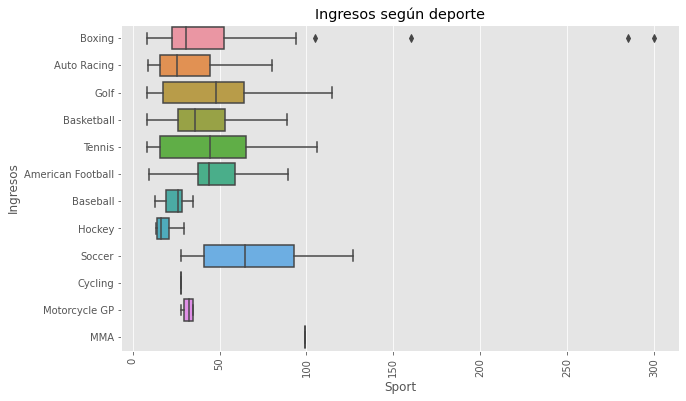

In [102]:
# Ingresos por deporte
plt.figure(figsize = (10,6))
sns.boxplot(data= df, y='Sport', x='Earnings ($M)')
plt.title('Ingresos según deporte')
plt.xlabel('Sport')
plt.xticks(rotation = 90) 
plt.ylabel('Ingresos')
plt.show()

De la figura anterior se observa que los jugadores de soccer mejores pagados suelen disfrutar de salarios promedio más altos.

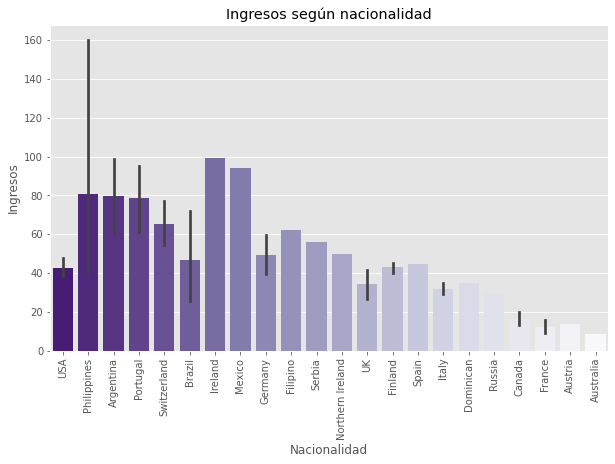

In [103]:
# Ingresos según nacionalidad 
plt.figure(figsize = (10,6))
sns.barplot(data= df.sort_values('Earnings ($M)',ascending=False), x='Nationality', y='Earnings ($M)', palette='Purples_r')
plt.title('Ingresos según nacionalidad')
plt.xlabel('Nacionalidad')
plt.xticks(rotation = 90) 
plt.ylabel('Ingresos')
plt.show()

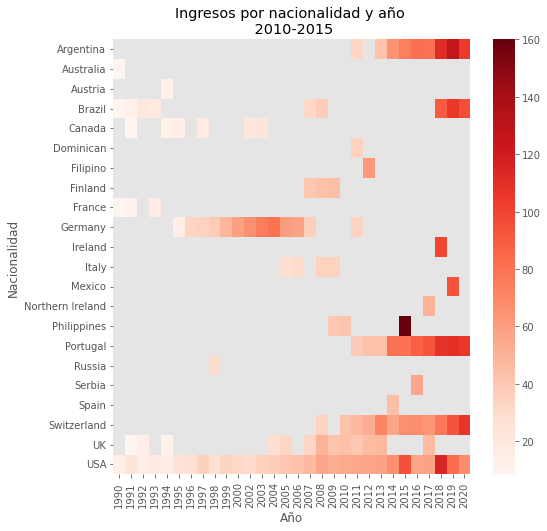

In [104]:
# Ingresos por nacionalidad y año
heatmap = df.pivot_table(index='Nationality', columns='Year', values ='Earnings ($M)')

plt.figure(figsize = (8,8))
sns.heatmap(data = heatmap, cmap="Reds")
plt.title('Ingresos por nacionalidad y año \n 2010-2015')
plt.xlabel('Año')
plt.yticks(rotation = 0)
plt.ylabel('Nacionalidad')
plt.show()


In [105]:
df.to_csv("Forbes Richest Atheletes (1990-2020) (Clean).csv") #Export Data Limpia

### 6. Insights

- Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [ ]:
df["Actual Rank"].astype(int) #Convertimos los datos de la columna "Actual Rank" a int

In [198]:
rank_10_20 = df[df.Year >= 2010] #Filtro, datos mayores o iguales 2010
rank_10_20 = rank_10_20.groupby(["Name"])[["Actual Rank","Year"]].agg(['min','max'])
rank_10_20

Actual Rank      Year      
                           min max   min   max
Name                                          
Aaron Rodgers                6   7  2013  2019
Alex Rodriguez               8   8  2011  2011
Andrew Luck                  6   6  2017  2017
Cam Newton                   7   7  2016  2016
Canelo Alvarez               4   4  2019  2019
Carson Wentz                10  10  2020  2020
Conor McGregor               4   4  2018  2018
Cristiano Ronaldo            1   9  2011  2020
David Beckham                5   8  2010  2013
Drew Brees                   5   5  2013  2013
Eli Manning                  9   9  2010  2010
Floyd Mayweather             1   2  2010  2018
James Harden                 9   9  2017  2017
Jordan Spieth                9   9  2016  2016
Kevin Durant                 5  10  2015  2020
Kirk Cousins                 9   9  2020  2020
Kobe Bryant                  2  10  2010  2016
LeBron James                 2   8  2010  2020
Lewis Hamilton              10  10  2017  2017
Lionel Messi                 1  10  2011  2020
Manny Pacquiao               2   8  2010  2015
Matt Ryan                    9  10  2014  2018
Matthew Stafford            10  10  2018  2018
Michael Schumacher           9   9  2011  2011
Neymar                       3   5  2018  2020
Novak Djokovic               6   6  2016  2016
Peyton Manning              10  10  2012  2012
Phil Mickelson               4   8  2010  2016
Rafael Nadal                 9   9  2014  2014
Roger Federer                1   7  2010  2020
Rory McIlroy                 6   6  2017  2017
Russell Wilson               6   6  2019  2019
Stephen Curry                6   9  2017  2020
Terrell Suggs               10  10  2010  2010
Tiger Woods                  1   9  2010  2020

In [199]:
rank_10_20[rank_10_20["Actual Rank"]["max"]>=(rank_10_20["Actual Rank"]["min"]+2)]["Actual Rank"]


,min,max
Name,,
Cristiano Ronaldo,1,9
David Beckham,5,8
Kevin Durant,5,10
Kobe Bryant,2,10
LeBron James,2,8
Lionel Messi,1,10
Manny Pacquiao,2,8
Neymar,3,5
Phil Mickelson,4,8


- Atleta con el menor número de apariciones y mayores ganancias.

In [200]:
athlete = df[df['Actual Rank'] == 1].sort_values(by='Year',ascending=False)
athlete1 = athlete.groupby(['Name']).max().sort_values('Earnings ($M)',ascending=False)
athlete1 ['Apariciones'] = athlete['Name'].value_counts()
result = athlete1.sort_values(["Apariciones","Earnings ($M)"])
result.head(1)


,Nationality,Actual Rank,Previous Rank,Sport,Year,Earnings ($M),Decade,Apariciones
Name,,,,,,,,
Evander Holyfield,USA,1,8,Boxing,1991,60.5,2,1


- Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

In [136]:
not_rank = df[df['Previous Rank'].str.contains('not ranked')]
not_rank =not_rank.groupby(["Sport","Nationality"])[["Name"]].nunique()
not_rank

Name
Sport             Nationality      
American Football USA             5
Auto Racing       Brazil          1
                  France          1
                  Germany         1
                  UK              1
                  USA             1
Baseball          USA             1
Basketball        USA             6
Boxing            USA             7
Golf              Australia       1
                  USA             3
Hockey            Canada          1
                  Russia          1

- País con mayor número de deportes con atletas en el dataset

In [116]:
country_sport = df.groupby(["Nationality"])[["Sport","Name"]].nunique()
country_sport = country_sport.sort_values(['Sport'],ascending=False)
country_sport.head(1)

,Sport,Name
Nationality,,
USA,8,54


- ¿Cuántos atletas por deporte tiene cada país?

In [107]:
Atheletes_Country=df.groupby(["Sport","Nationality"])["Name"].nunique()

In [108]:
Atheletes_Country=pd.DataFrame(Atheletes_Country)
Atheletes_Country

Name
Sport             Nationality           
American Football USA                 17
Auto Racing       Austria              1
                  Brazil               1
                  Canada               1
                  Finland              1
                  France               1
                  Germany              1
                  UK                   2
                  USA                  2
Baseball          Dominican            1
                  USA                  3
Basketball        USA                 12
Boxing            Canada               1
                  Filipino             1
                  Mexico               1
                  Philippines          1
                  USA                 11
Cycling           USA                  1
Golf              Australia            1
                  Northern Ireland     1
                  USA                  6
Hockey            Canada               2
                  Russia               1
MMA               Ireland              1
Motorcycle GP     Italy                1
Soccer            Argentina            1
                  Brazil               2
                  Portugal             1
                  UK                   1
Tennis            Serbia               1
                  Spain                1
                  Switzerland          1
                  USA                  3

- Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

In [183]:
df.groupby(["Nationality","Sport"])["Earnings ($M)"].agg(['min','max'])


min    max
Nationality      Sport                         
Argentina        Soccer             32.3  127.0
Australia        Golf                8.5    8.5
Austria          Auto Racing        13.5   13.5
Brazil           Auto Racing        10.0   22.0
                 Soccer             31.0  105.0
Canada           Auto Racing        20.0   23.0
                 Boxing             10.2   10.2
                 Hockey             13.5   17.9
Dominican        Baseball           35.0   35.0
Filipino         Boxing             62.0   62.0
Finland          Auto Racing        40.0   45.0
France           Auto Racing         9.0   16.0
Germany          Auto Racing        15.0   80.0
Ireland          MMA                99.0   99.0
Italy            Motorcycle GP      28.0   35.0
Mexico           Boxing             94.0   94.0
Northern Ireland Golf               50.0   50.0
Philippines      Boxing             40.0  160.0
Portugal         Soccer             38.0  109.0
Russia           Hockey             29.8   29.8
Serbia           Tennis             55.8   55.8
Spain            Tennis             44.5   44.5
Switzerland      Tennis             35.0  106.3
UK               Auto Racing         9.0   46.0
                 Soccer             28.0   50.0
USA              American Football   9.5   89.5
                 Auto Racing        19.1   34.0
                 Baseball           12.7   29.0
                 Basketball          8.1   89.0
                 Boxing              8.1  300.0
                 Cycling            28.0   28.0
                 Golf                8.1  115.0
                 Tennis              8.5   28.2

- Atleta con mayores ganancias por deporte por década

In [178]:
#Agrupamos los años en decadas, las representaciones son:
# decada: 1:-1990, 2: 1991-2000, 3: 2001-2010, 4: 2011-2020
df["Decade"]=df["Year"].apply(lambda x: '4' if x>2010 and x<=2020 else ('3' if x>2000 and x<=2010 else ( '2' if  x>1990 and x<=2000 else '1')))

In [177]:
df  #Comprobación visual de las decadas

,Name,Nationality,Actual Rank,Previous Rank,Sport,Year,Earnings ($M),Decade
Index,,,,,,,,
1,Mike Tyson,USA,1,not ranked,Boxing,1990,28.6,1
2,Buster Douglas,USA,2,not ranked,Boxing,1990,26.0,1
3,Sugar Ray Leonard,USA,3,not ranked,Boxing,1990,13.0,1
4,Ayrton Senna,Brazil,4,not ranked,Auto Racing,1990,10.0,1
5,Alain Prost,France,5,not ranked,Auto Racing,1990,9.0,1
...,...,...,...,...,...,...,...,...
297,Stephen Curry,USA,6,9,Basketball,2020,74.4,4
298,Kevin Durant,USA,7,10,Basketball,2020,63.9,4
299,Tiger Woods,USA,8,11,Golf,2020,62.3,4


In [182]:
df.groupby(["Decade","Sport"])[["Name","Earnings ($M)"]].max().sort_values(["Decade","Earnings ($M)"],ascending=False)

Name  Earnings ($M)
Decade Sport                                               
4      Boxing                 Manny Pacquiao          300.0
       Soccer                         Neymar          127.0
       Tennis                  Roger Federer          106.3
       MMA                    Conor McGregor           99.0
       American Football      Russell Wilson           89.5
       Basketball              Stephen Curry           89.0
       Golf                      Tiger Woods           78.1
       Auto Racing        Michael Schumacher           46.0
       Baseball               Alex Rodriguez           35.0
3      Golf                      Tiger Woods          115.0
       Auto Racing        Michael Schumacher           80.0
       Boxing               Oscar De La Hoya           65.0
       Soccer                     Ronaldinho           50.0
       Basketball           Shaquille O'Neal           48.0
       Tennis                  Roger Federer           43.0
       American Football           Tom Brady           42.0
       Motorcycle GP         Valentino Rossi           35.0
       Baseball               Alex Rodriguez           29.0
       Cycling               Lance Armstrong           28.0
2      Basketball           Shaquille O'Neal           78.3
       Boxing                   Riddick Bowe           75.0
       Auto Racing             Nigel Mansell           59.0
       Golf                      Tiger Woods           53.0
       Hockey                  Wayne Gretzky           29.8
       American Football         Joe Montana           22.5
       Baseball               Gary Sheffield           17.2
       Tennis                   Monica Seles           16.0
1      Boxing              Sugar Ray Leonard           28.6
       Auto Racing              Ayrton Senna           10.0
       Golf                    Jack Nicklaus            8.6
       Basketball             Michael Jordan            8.1

- Ganancia total por cada deporte por cada año.

In [ ]:
df.groupby(["Year","Sport"])[["Earnings ($M)"]].sum()

Earnings ($M)
Year Sport                           
1990 Auto Racing                 19.0
     Basketball                   8.1
     Boxing                      75.7
     Golf                        25.2
1991 Auto Racing                 33.0
...                               ...
2020 American Football          119.6
     Basketball                 226.5
     Golf                        62.3
     Soccer                     304.5
     Tennis                     106.3

[168 rows x 1 columns]